# 군집화(Clustering)

* 대표적인 비지도학습 알고리즘
* 레이블이 없는 데이터를 그룹화 하는 알고리즘

![clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## 데이터 생성

In [3]:
def plot_data(dataset, position, title):
    X, y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1])

In [4]:
np.random.seed(0)
n_samples = 1500
random_state = 0 
noise = 0.05

In [5]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5,
                                noise = noise, random_state=random_state)

moons = datasets.make_moons(n_samples=n_samples, 
                                noise = noise, random_state=random_state)

blobs= datasets.make_blobs(n_samples=n_samples, 
                             random_state=random_state)

no_structures = np.random.rand(n_samples, 2), None


In [6]:
dataset_l = [circles, moons, blobs, no_structures]
dataset_names = ['Circles','Moons', 'Blobs', 'No_structures']

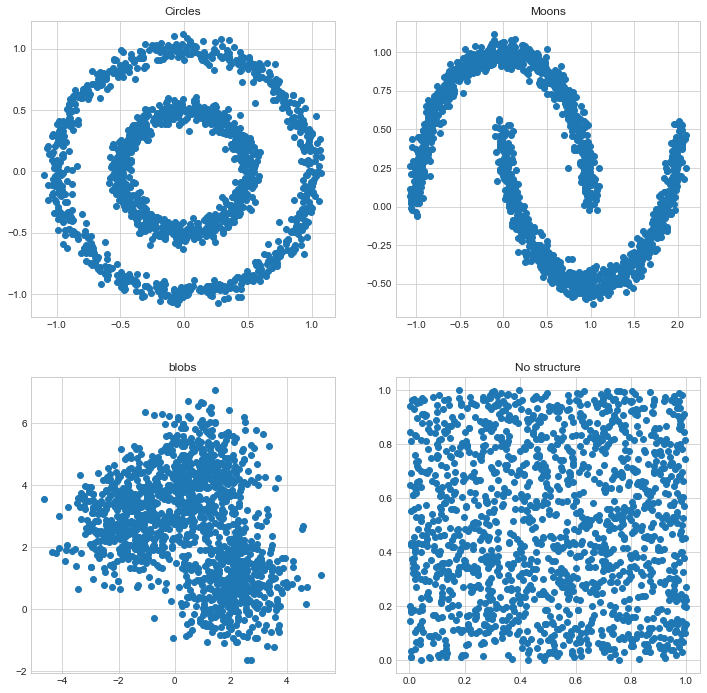

In [7]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'blobs')
plot_data(no_structures, 224, 'No structure')

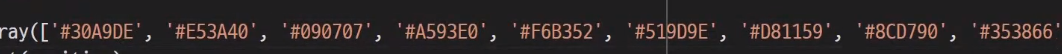

In [8]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int)
        
    else:
        labels = model.predict(X)
        
    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0',
                       '#F6B352', '#519D9E', '#D81159', '#8CD790',
                       '#353866', '#A4D6D1'])
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], c = colors[labels])

* html 색상 코드 추천

https://www.color-hex.com/

## K-평균 (K-Means)

* n개의 등분산 그룹으로 군집화
* 제곱합 함수를 최소화
* 군집화 개수를 지정해야 한다.
* 각 군집 $C$의 평균 $\mu_j$을 중심점 이라고 함
* 다음을 만족하는 중심점을 찾는것이 목표

\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

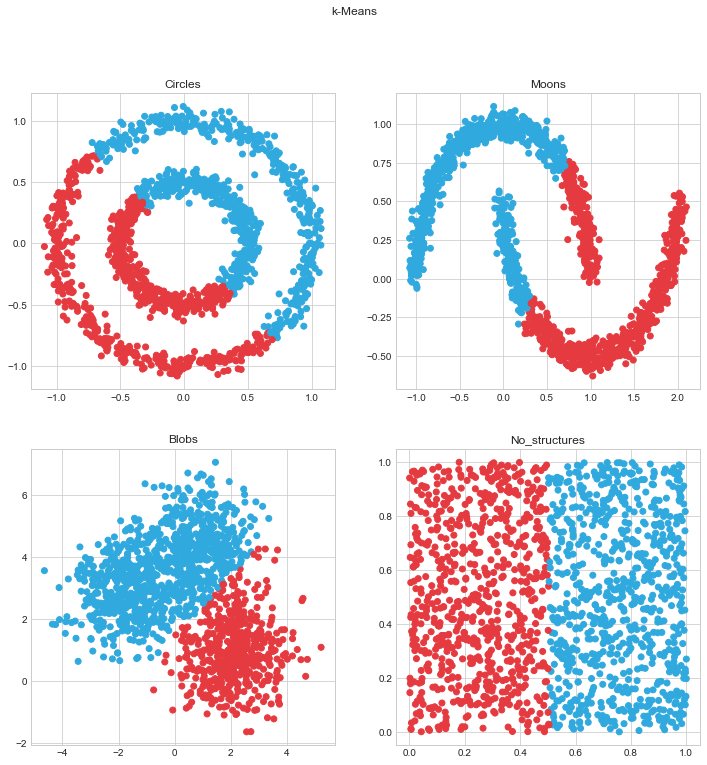

In [9]:
model = cluster.KMeans(n_clusters=2, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-Means')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

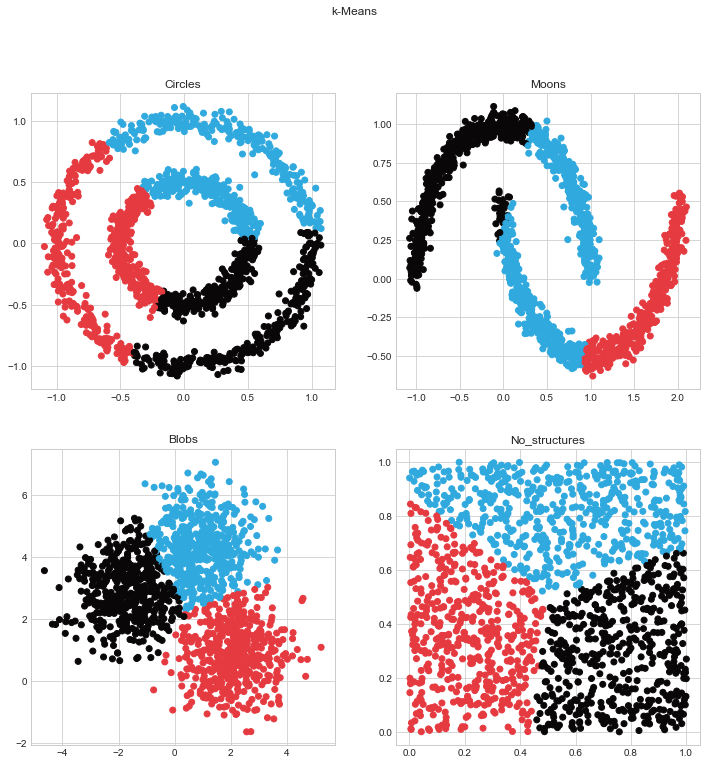

In [10]:
model = cluster.KMeans(n_clusters=3, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-Means')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

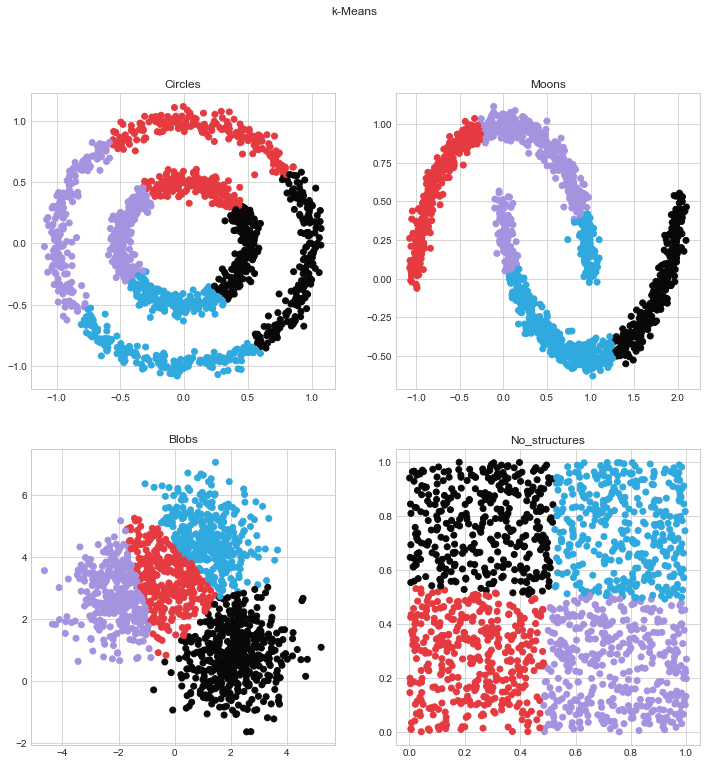

In [11]:
model = cluster.KMeans(n_clusters=4, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-Means')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

### 붓꽃 데이터 군집화
* K-Means 알고리즘을 사용해 붓꽃 데이터를 군집화 해본다.
* 같은 종류의 붓꽃끼리 잘 군집화가 되었다.

In [12]:
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()

In [14]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

In [15]:
idx = np.where(predict==0)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
idx = np.where(predict==1)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
idx = np.where(predict==2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
result_df = pd.DataFrame({'target':iris.target, 'cluster_pred':predict})
result_df

target  cluster_pred
0         0             0
1         0             0
2         0             0
3         0             0
4         0             0
..      ...           ...
145       2             2
146       2             1
147       2             2
148       2             2
149       2             1

[150 rows x 2 columns]

In [19]:
print('정확도',(result_df.target == result_df.cluster_pred).sum()/result_df.shape[0])

정확도 0.8933333333333333


## 미니 배치 K-평균 (Mini Batch K-Means)

* 배치 처리를 통해 계산 시간을 줄인 K-평균
* K-평균과 다른 결과가 나올 수 있다.

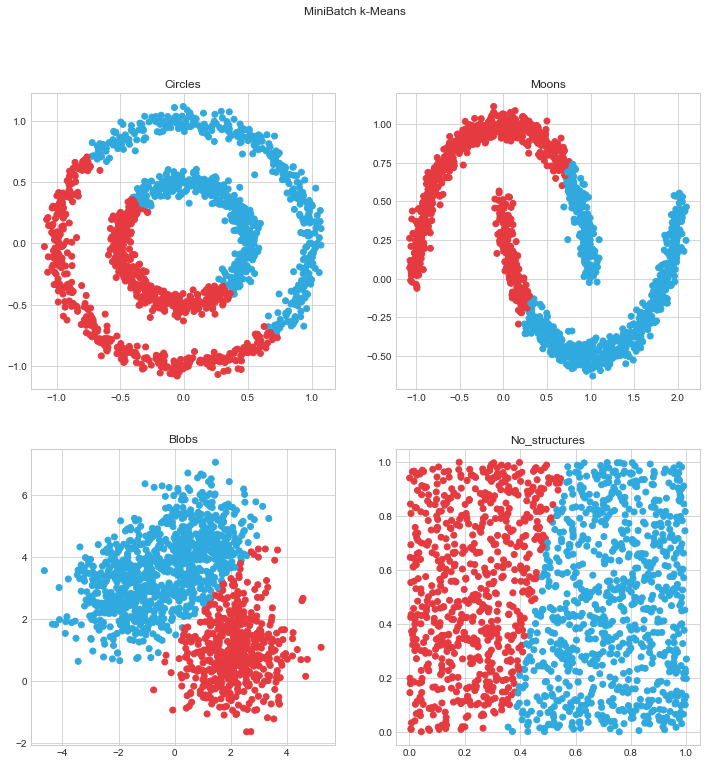

In [20]:
model = cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch k-Means')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

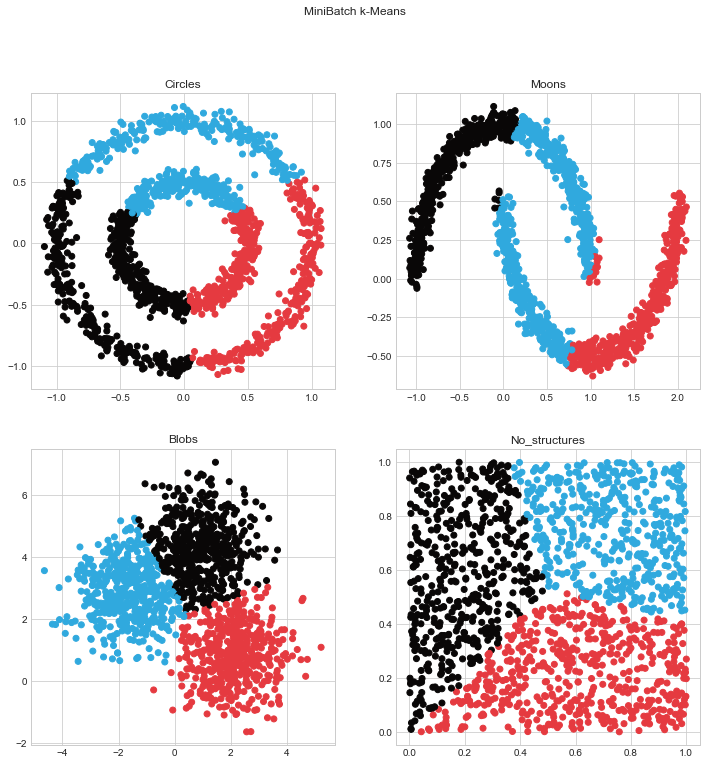

In [21]:
model = cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch k-Means')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

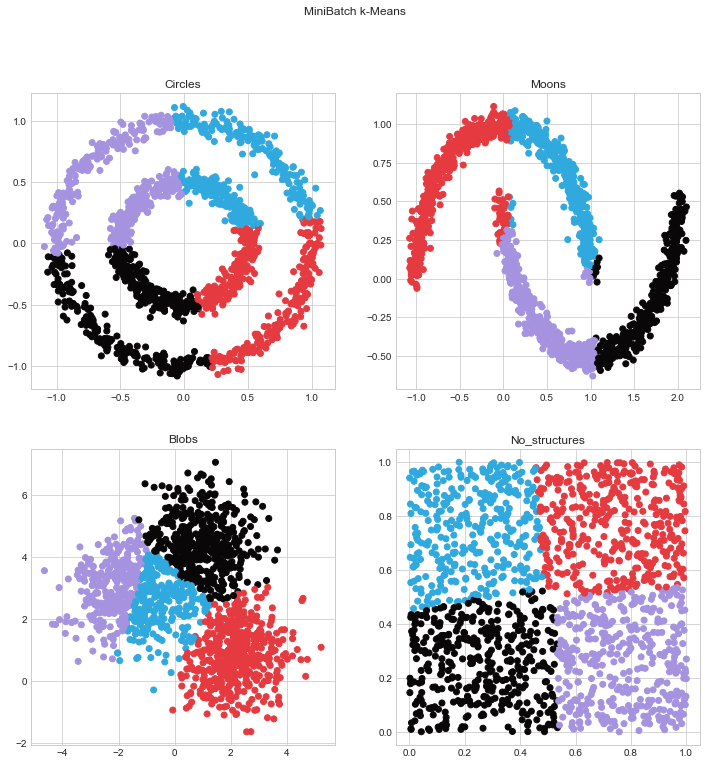

In [22]:
model = cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch k-Means')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

## Affinity Propagation

* 샘플 쌍 끼리 메시지를 보내 군집을 생성
* 샘플을 대표하는 적절한 예를 찾을 때까지 반복
* 군집의 갯수를 자동으로 정함

![affinity propagation](https://scikit-learn.org/stable/_images/sphx_glr_plot_affinity_propagation_0011.png)

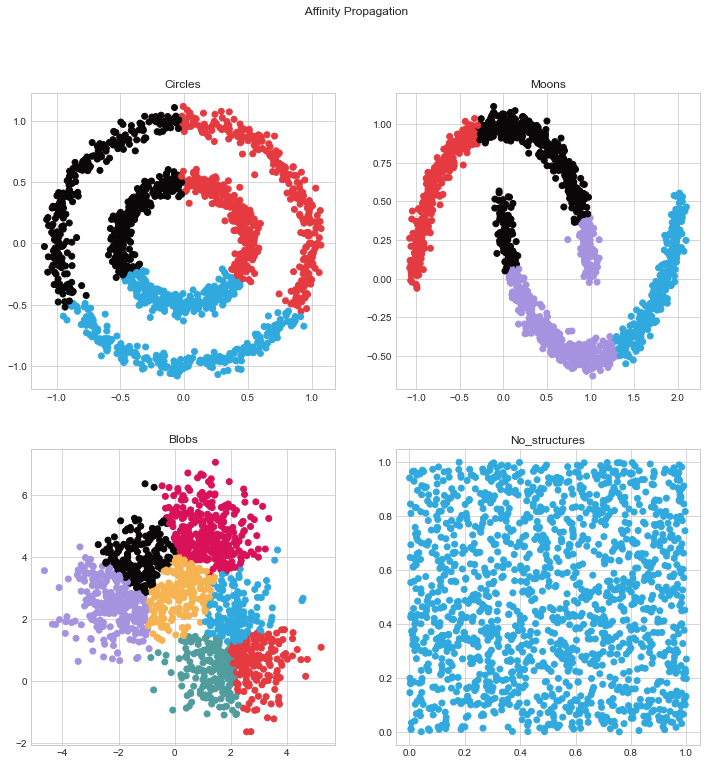

In [23]:
model = cluster.AffinityPropagation(damping=0.9, preference=-200)

fig = plt.figure(figsize=(12, 12))
fig.suptitle(' Affinity Propagation')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

## Mean Shift

* 중심점 후보를 정해진 구역 내 평균으로 업데이트

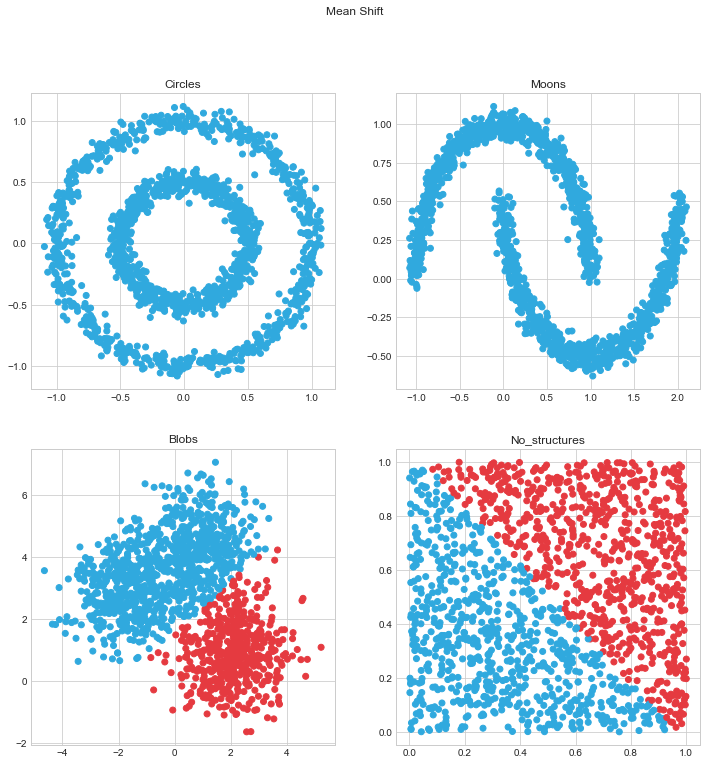

In [24]:
model = cluster.MeanShift()

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Mean Shift')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

## 스펙트럼 군집화 (Spectral Clustering)

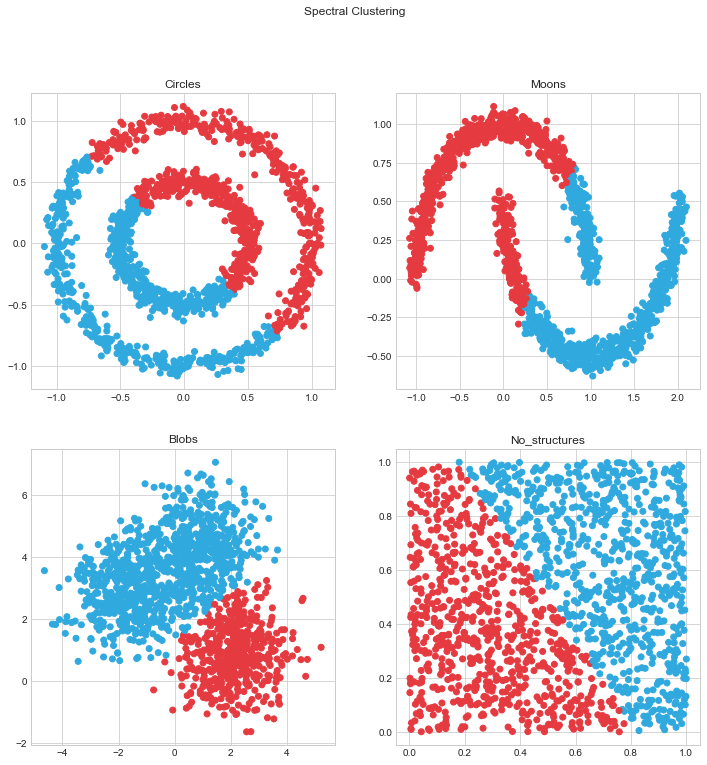

In [25]:
model = cluster.SpectralClustering(n_clusters=2, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

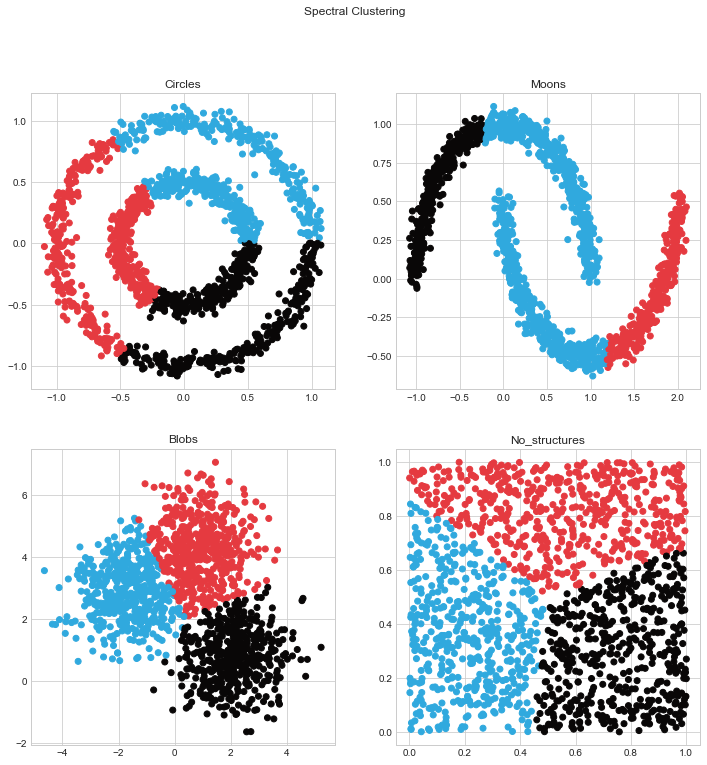

In [26]:
model = cluster.SpectralClustering(n_clusters=3, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

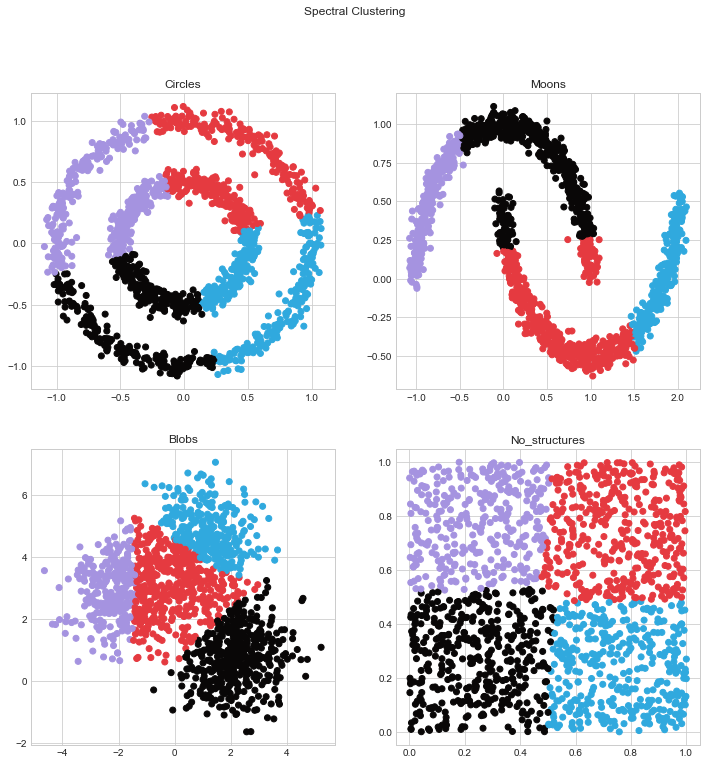

In [27]:
model = cluster.SpectralClustering(n_clusters=4, random_state=random_state)

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

### 유방암 데이터 군집화

In [28]:
from sklearn.datasets import load_breast_cancer

In [29]:
cancer = load_breast_cancer()

In [30]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
                                   affinity='nearest_neighbors')

model.fit(cancer.data)
predict = model.labels_

In [31]:
idx = np.where(predict==0)
predict[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
idx = np.where(predict==1)
predict[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [33]:
df = pd.DataFrame({'target':cancer.target,'Cluster_pred': predict})
df

target  Cluster_pred
0         0             0
1         0             0
2         0             0
3         0             1
4         0             0
..      ...           ...
564       0             0
565       0             0
566       0             0
567       0             0
568       1             1

[569 rows x 2 columns]

In [34]:
acc = max((df.target != df.Cluster_pred).sum()/df.shape[0],(df.target == df.Cluster_pred).sum()/df.shape[0])

In [35]:
print('정확도',acc)

정확도 0.8242530755711776


## 계층 군집화 (Hierarchical Clustering)

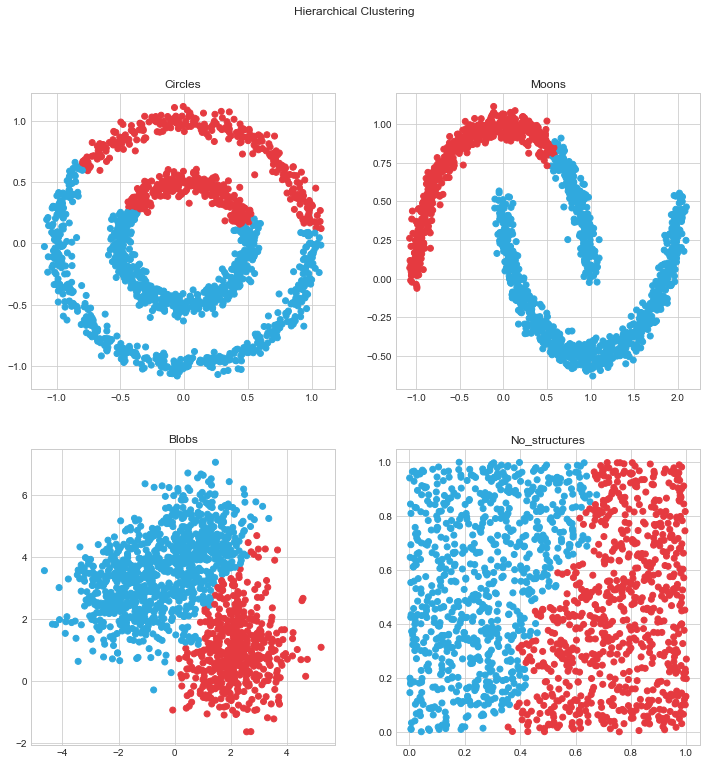

In [36]:
model = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward')
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

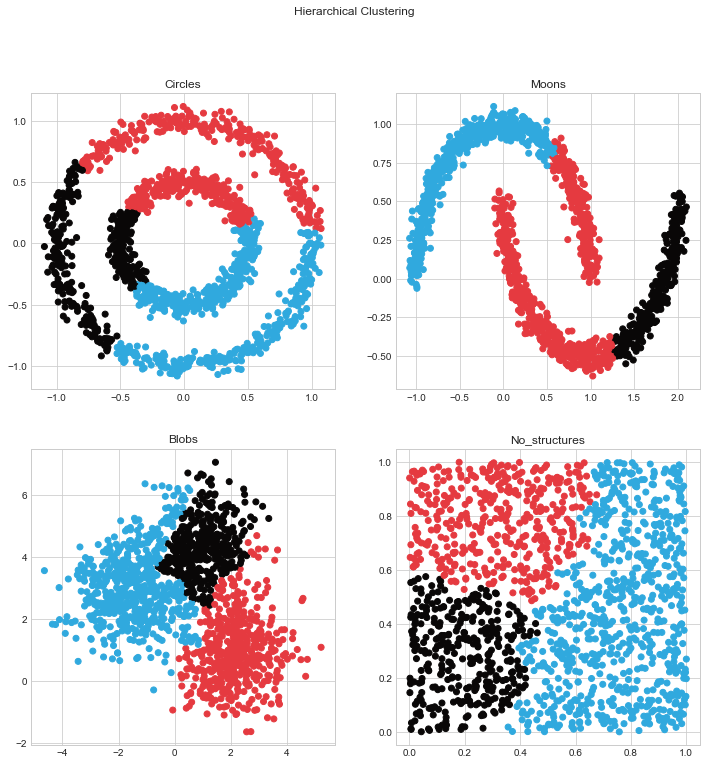

In [37]:
model = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

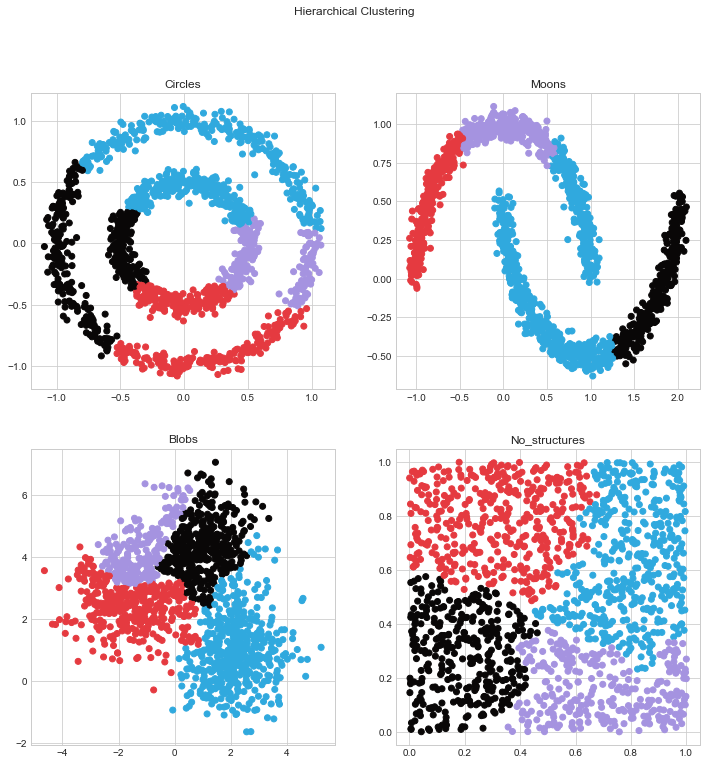

In [38]:
model = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward')
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

### 와인 데이터 군집화

In [39]:
from sklearn.datasets import load_wine

In [40]:
wine = load_wine()

In [41]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [42]:
idx = np.where(predict==0)
predict[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [43]:
idx = np.where(predict==1)
predict[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [44]:
idx = np.where(predict==2)
predict[idx]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [45]:
df = pd.DataFrame({'target':wine.target, 'pred':predict})
df

target  pred
0         0     0
1         0     0
2         0     0
3         0     0
4         0     2
..      ...   ...
173       2     2
174       2     2
175       2     2
176       2     2
177       2     1

[178 rows x 2 columns]

In [46]:
(df.target == df.pred).sum()/ df.shape[0]

0.6966292134831461

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

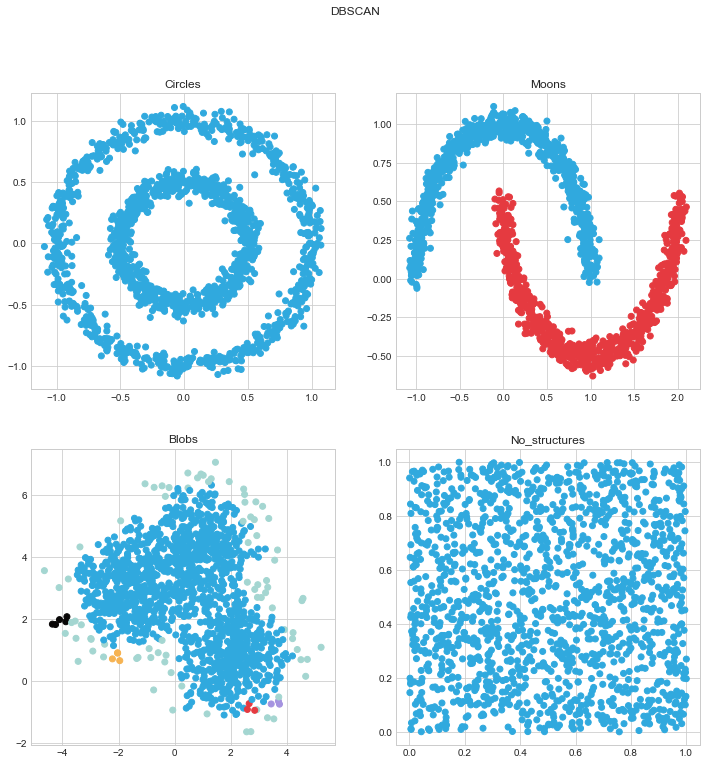

In [47]:
model = cluster.DBSCAN(eps=0.3)
fig = plt.figure(figsize=(12, 12))
fig.suptitle('DBSCAN')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

## OPTICS (Ordering Points To Identify the Clustering Structure)

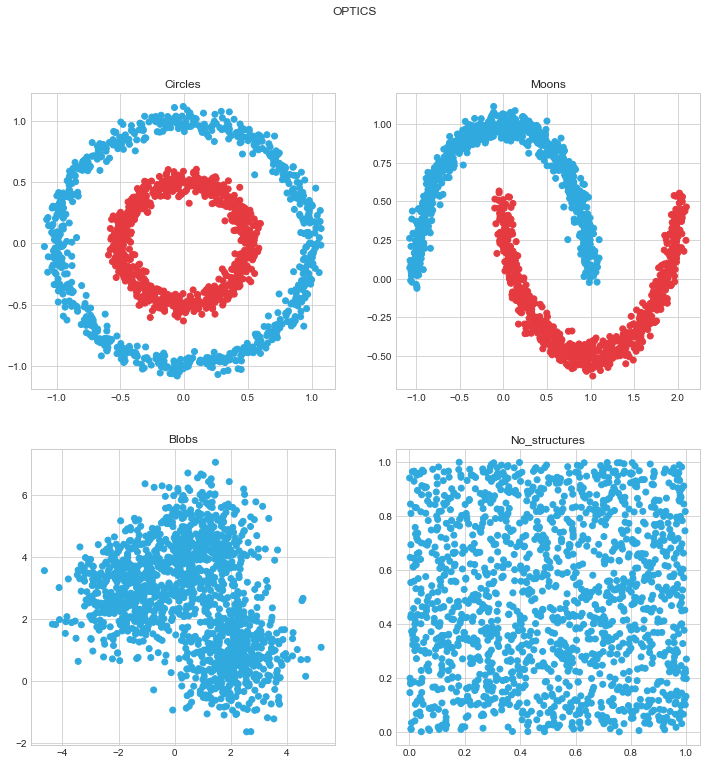

In [48]:
model = cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1)
fig = plt.figure(figsize=(12, 12))
fig.suptitle('OPTICS')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

## Birch (Balanced iterative reducing and clustering using hierarchies)

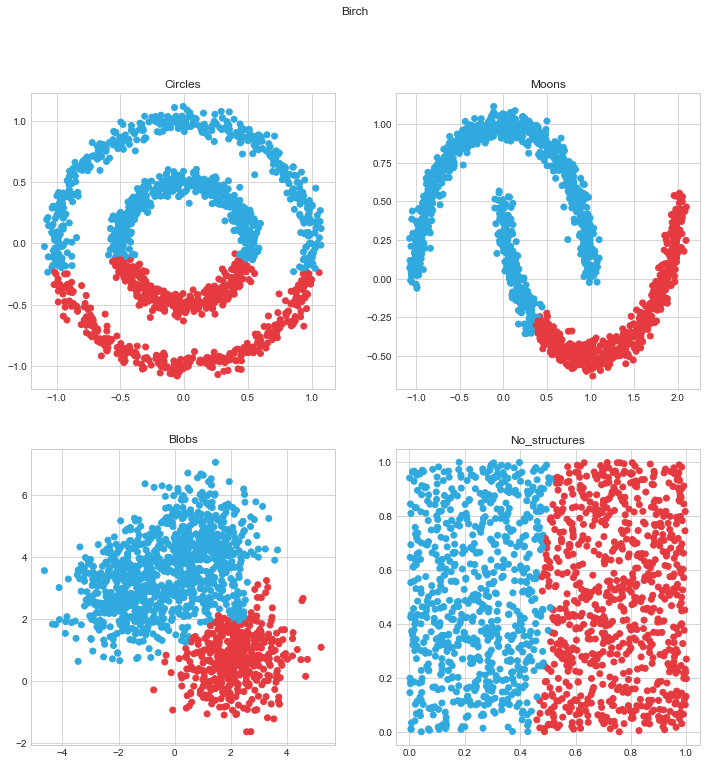

In [49]:
model = cluster.Birch(n_clusters=2, threshold=.3)
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

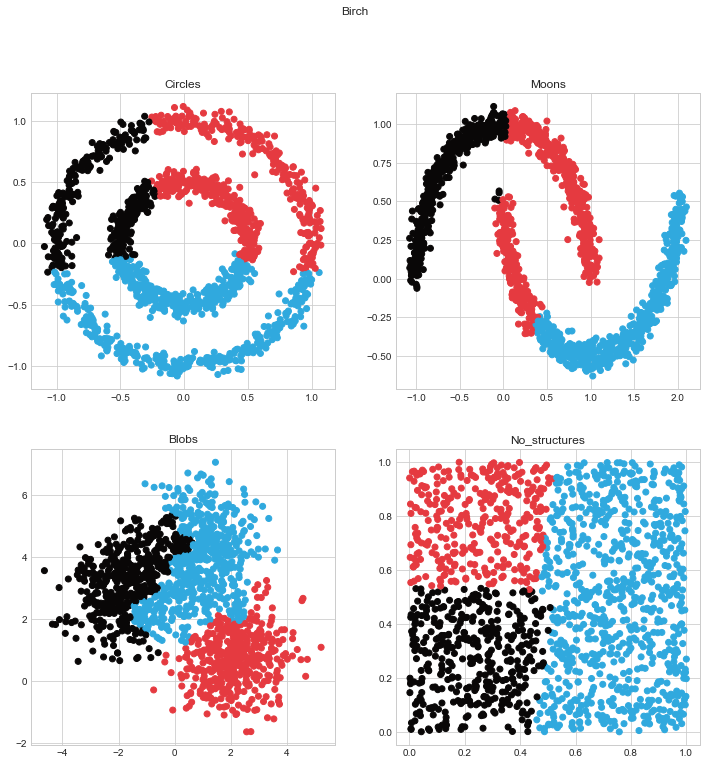

In [50]:
model = cluster.Birch(n_clusters=3, threshold=.3)
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

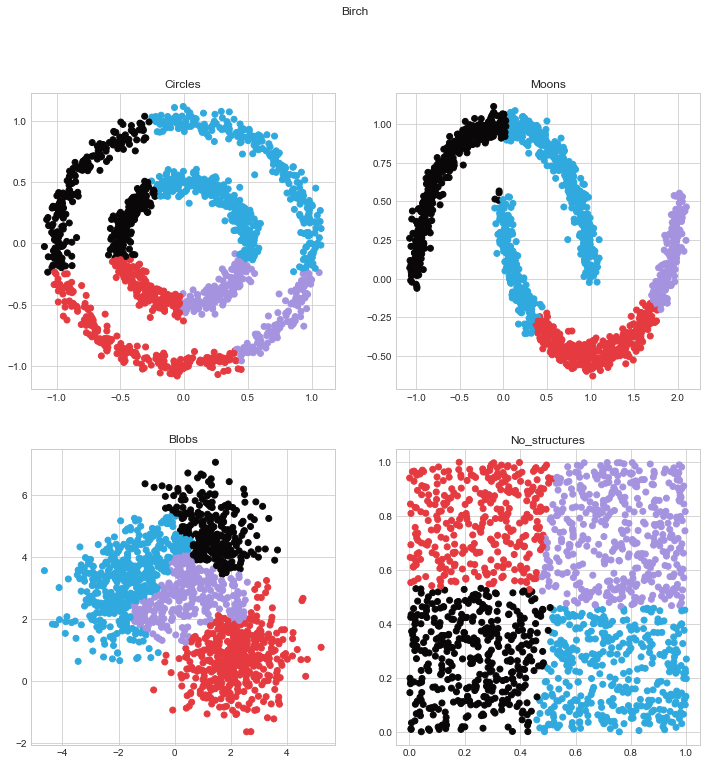

In [51]:
model = cluster.Birch(n_clusters=4, threshold=.3)
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

for i, position in enumerate(np.arange(221,225)):
    fit_predict_plot(model, dataset_l[i], position, dataset_names[i])

## 손글씨 데이터 군집화

In [52]:
from sklearn.datasets import load_digits

In [53]:
digits = load_digits()

In [54]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [55]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [56]:
X = digits.data.reshape(-1, 8, 8)
y = digits.target

In [57]:
plt.style.use(['seaborn-white'])

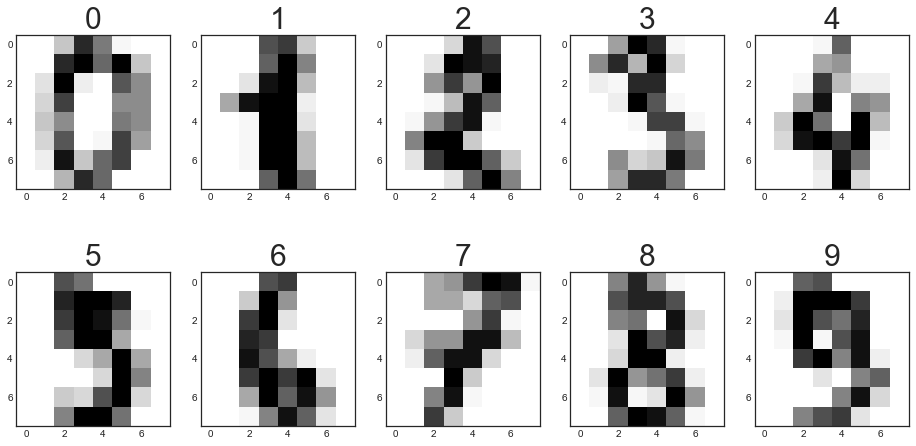

In [58]:
plt.figure(figsize=(16, 8))


for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i])
    plt.title(y[i],fontdict={'size':'30'})

### K-Means

In [59]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)

predict = kmeans.predict(digits.data)

In [60]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster{}번째: {}'.format(i+1, real_class))

Cluster1번째: [1 1 7 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 9 9 1 1 1 1 1 1 1
 1 4 1 1 1 1 4 8 9 9 4 9 9 9 9 7 9 9 9 9 9 9 9 8 8 8 8 1 1 1 1 1 1 1 1 1 1
 1 8 1 1 1 1 1 1 1 1 6 9 9 9 9 9 4]
Cluster2번째: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4
 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4]
Cluster3번째: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 8 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Cluster4번째: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5

Cluster:1


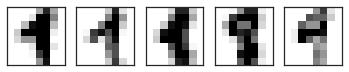

Cluster:2


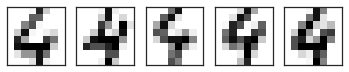

Cluster:3


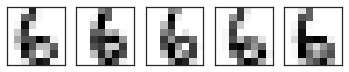

Cluster:4


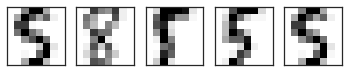

Cluster:5


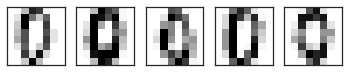

Cluster:6


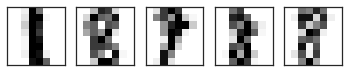

Cluster:7


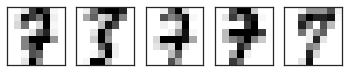

Cluster:8


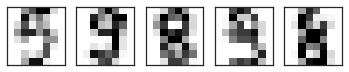

Cluster:9


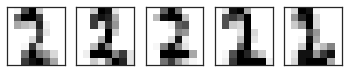

Cluster:10


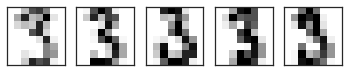

In [61]:
for i in range(10):
    
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]
    
    k = 1
    
    print('Cluster:{}'.format(i + 1))
    
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k +=1
        
    plt.show()

In [62]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    print('Cluster{}번째: {}'.format(i+1, predict_number))

Cluster1번째: 1
Cluster2번째: 4
Cluster3번째: 6
Cluster4번째: 5
Cluster5번째: 0
Cluster6번째: 8
Cluster7번째: 7
Cluster8번째: 9
Cluster9번째: 2
Cluster10번째: 3


In [63]:
cnt = 0
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    cnt += (real_class==predict_number).sum()
    
print("정확도", cnt/digits.target.shape[0])
    


정확도 0.7941012799109627


### Spectral Clustering

In [64]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')

spectral.fit(digits.data)

predict = spectral.labels_

In [65]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster{}번째: {}'.format(i+1, real_class))

Cluster1번째: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cluster2번째: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Cluster3번째: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 8 3 3 9 3 9 3
 9 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 8 3 3 9 8 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 

Cluster:1


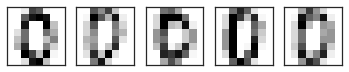

Cluster:2


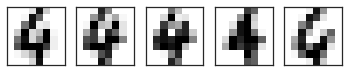

Cluster:3


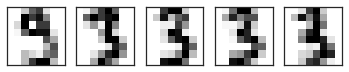

Cluster:4


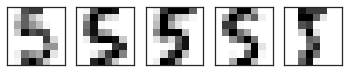

Cluster:5


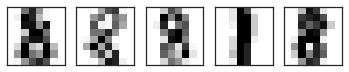

Cluster:6


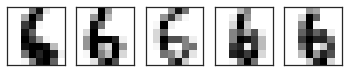

Cluster:7


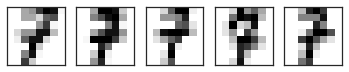

Cluster:8


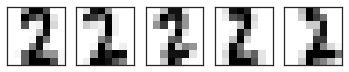

Cluster:9


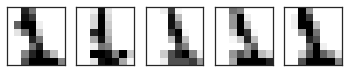

Cluster:10


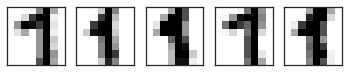

In [66]:
for i in range(10):
    
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]
    
    k = 1
    
    print('Cluster:{}'.format(i + 1))
    
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k +=1
        
    plt.show()

In [67]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    print('Cluster{}번째: {}'.format(i+1, predict_number))

Cluster1번째: 0
Cluster2번째: 4
Cluster3번째: 3
Cluster4번째: 5
Cluster5번째: 8
Cluster6번째: 6
Cluster7번째: 7
Cluster8번째: 2
Cluster9번째: 1
Cluster10번째: 1


In [68]:
cnt = 0
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    cnt += (real_class==predict_number).sum()
    
print("정확도", cnt/digits.target.shape[0])
    


정확도 0.8230383973288815


### Hierarchical Clustering

In [69]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [70]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster{}번째: {}'.format(i+1, real_class))

Cluster1번째: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster2번째: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster:1


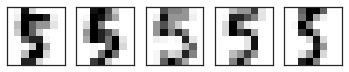

Cluster:2


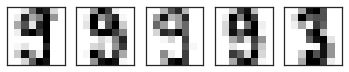

Cluster:3


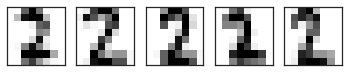

Cluster:4


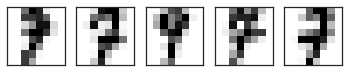

Cluster:5


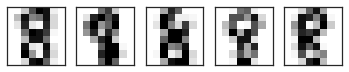

Cluster:6


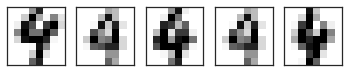

Cluster:7


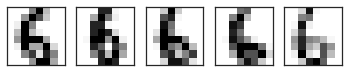

Cluster:8


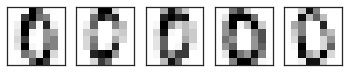

Cluster:9


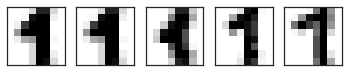

Cluster:10


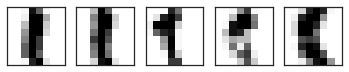

In [71]:
for i in range(10):
    
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]
    
    k = 1
    
    print('Cluster:{}'.format(i + 1))
    
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k +=1
        
    plt.show()

In [72]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    print('Cluster{}번째: {}'.format(i+1, predict_number))

Cluster1번째: 5
Cluster2번째: 3
Cluster3번째: 2
Cluster4번째: 7
Cluster5번째: 8
Cluster6번째: 4
Cluster7번째: 6
Cluster8번째: 0
Cluster9번째: 1
Cluster10번째: 1


In [73]:
cnt = 0
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    cnt += (real_class==predict_number).sum()
    
print("정확도", cnt/digits.target.shape[0])
    


정확도 0.8619922092376182


### Birch

In [84]:
birch = cluster.Birch(n_clusters=10, threshold=.8)
birch.fit(digits.data)
predict = birch.labels_

In [85]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    print('Cluster{}번째: {}'.format(i+1, real_class))

Cluster1번째: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster2번째: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

Cluster:1


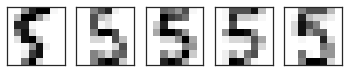

Cluster:2


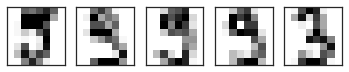

Cluster:3


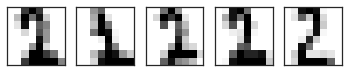

Cluster:4


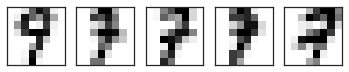

Cluster:5


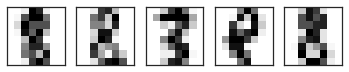

Cluster:6


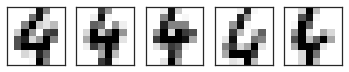

Cluster:7


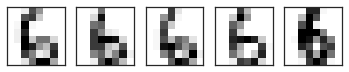

Cluster:8


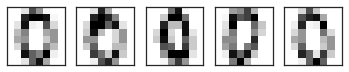

Cluster:9


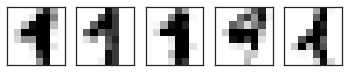

Cluster:10


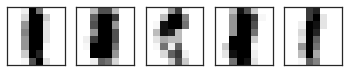

In [86]:
for i in range(10):
    
    idx = np.where(predict == i)[0]
    choice_idx = np.random.choice(idx, size=5)
    choice_image = X[choice_idx]
    
    k = 1
    
    print('Cluster:{}'.format(i + 1))
    
    for image in choice_image:
        plt.subplot(1, 5, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
        k +=1
        
    plt.show()

In [87]:
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    print('Cluster{}번째: {}'.format(i+1, predict_number))

Cluster1번째: 5
Cluster2번째: 3
Cluster3번째: 2
Cluster4번째: 7
Cluster5번째: 8
Cluster6번째: 4
Cluster7번째: 6
Cluster8번째: 0
Cluster9번째: 1
Cluster10번째: 1


In [88]:
cnt = 0
for i in range(10):
    idx = np.where(predict==i)
    real_class = digits.target[idx]
    predict_number = pd.Series(real_class).value_counts().idxmax()
    cnt += (real_class==predict_number).sum()
    
print("정확도", cnt/digits.target.shape[0])
    


정확도 0.8619922092376182
